In [390]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ydata_profiling as pf
from sklearn.metrics import silhouette_score


In [295]:
path = os.getcwd()
files = os.listdir(path)
files

['data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-agustus.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-april.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-desember (1).csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-februari.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-januari.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-juli.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-juni.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-maret.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-mei.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-november.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-oktober.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-

In [296]:
data = [i for i in files if i[-3:] == 'csv']

In [297]:
data

['data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-agustus.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-april.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-desember (1).csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-februari.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-januari.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-juli.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-juni.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-maret.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-mei.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-november.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2017-bulan-oktober.csv',
 'data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-

In [298]:
df = pd.DataFrame()

In [299]:
for i in data:
    x = pd.read_csv(i)
    df = df.append(x)

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\5463066.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\5463066.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\5463066.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\5463066.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(x)
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\5463066.py:3: Fut

In [300]:
df = df.reset_index(drop = True)
df

kota_administrasi           kecamatan               kelurahan  \
0        Jakarta Barat       KEC.KEMBANGAN  KEL. KEMBANGAN SELATAN   
1      Jakarta Selatan  KEC.KEBAYORAN LAMA            KEL. CIPULIR   
2      Jakarta Selatan  KEC.KEBAYORAN LAMA     KEL. PONDOK PINANG    
3      Jakarta Selatan        KEC.CILANDAK        KEL. PONDOK LABU   
4      Jakarta Selatan  KEC.KEBAYORAN BARU          KEL. PETOGOGAN   
...                ...                 ...                     ...   
3191     Jakarta Timur         KRAMAT JATI                  CAWANG   
3192     Jakarta Timur         KRAMAT JATI               CILILITAN   
3193     Jakarta Timur         KRAMAT JATI             BALEKAMBANG   
3194     Jakarta Timur          JATINEGARA             BIDARA CINA   
3195     Jakarta Timur          JATINEGARA          KAMPUNG MELAYU   

                         rw  jumlah_terdampak_rw  jumlah_terdampak_rt  \
0                    RW. 09                  1.0                  2.0   
1                    RW. 10                  1.0                  1.0   
2                 RW 05, 08                  2.0                  3.0   
3        RW. 01, 03, 07, 10                  4.0                  8.0   
4                RW. 02, 03                  2.0                 22.0   
...                     ...                  ...                  ...   
3191  RW 01, 02, 03, 05, 08                  5.0                 13.0   
3192              RW 06, 07                  2.0                  5.0   
3193              RW 02, 05                  2.0                  2.0   
3194             RW 07, 011                  2.0                  6.0   
3195      RW 04, 05, 07, 08                  4.0                 18.0   

     jumlah_terdampak_kk jumlah_terdampak_jiwa  ketinggian_air  \
0                    0.0                   0.0           15 cm   
1                    0.0                   0.0    20 s/d 50 cm   
2                    0.0                   0.0    10 s/d 40 cm   
3                    0.0                   0.0    10 s/d 80 cm   
4                    0.0                   0.0    10 s/d 20 cm   
...                  ...                   ...             ...   
3191                  37                   110  10 s.d. 100 cm   
3192                  58                   158   10 s.d. 50 cm   
3193                   0                     0   10 s.d. 30 cm   
3194                  41                   121   10 s.d. 70 cm   
3195                 248                   807   10 s.d. 75 cm   

           tanggal_kejadian  lama_genangan  jumlah_meninggal  jumlah_hilang  \
0                    tgl.10            0.0               0.0            0.0   
1                    tgl.10            0.0               0.0            0.0   
2                    tgl.10            0.0               0.0            0.0   
3                    tgl.10            0.0               0.0            0.0   
4                    tgl.10            0.0               0.0            0.0   
...                     ...            ...               ...            ...   
3191      tgl. 22 September            0.0               0.0            0.0   
3192      tgl. 22 September            0.0               0.0            0.0   
3193      tgl. 22 September            0.0               0.0            0.0   
3194  tgl. 22, 28 September            0.0               0.0            0.0   
3195      tgl. 22 September            0.0               0.0            0.0   

      jumlah_luka_berat  jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
0                   0.0                 0.0                         0.0   
1                   0.0                 0.0                         0.0   
2                   0.0                 0.0                         0.0   
3                   0.0                 0.0                         0.0   
4                   0.0                 0.0                         0.0   
...                 ...                 ...                         ...   
3191                

In [301]:
full_profile = pf.ProfileReport(df, title='Profiling Report', html={'style':{'full_width':True}})
full_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kota_administrasi           3143 non-null   object 
 1   kecamatan                   3143 non-null   object 
 2   kelurahan                   3143 non-null   object 
 3   rw                          3143 non-null   object 
 4   jumlah_terdampak_rw         3143 non-null   float64
 5   jumlah_terdampak_rt         3143 non-null   float64
 6   jumlah_terdampak_kk         3143 non-null   object 
 7   jumlah_terdampak_jiwa       3143 non-null   object 
 8   ketinggian_air              3143 non-null   object 
 9   tanggal_kejadian            3143 non-null   object 
 10  lama_genangan               3143 non-null   float64
 11  jumlah_meninggal            3143 non-null   float64
 12  jumlah_hilang               3143 non-null   float64
 13  jumlah_luka_berat           3143 

In [303]:
df[df['kota_administrasi'].isna()]

kota_administrasi kecamatan kelurahan   rw  jumlah_terdampak_rw  \
6                 NaN       NaN       NaN  NaN                  NaN   
7                 NaN       NaN       NaN  NaN                  NaN   
8                 NaN       NaN       NaN  NaN                  NaN   
9                 NaN       NaN       NaN  NaN                  NaN   
10                NaN       NaN       NaN  NaN                  NaN   
11                NaN       NaN       NaN  NaN                  NaN   
12                NaN       NaN       NaN  NaN                  NaN   
13                NaN       NaN       NaN  NaN                  NaN   
14                NaN       NaN       NaN  NaN                  NaN   
15                NaN       NaN       NaN  NaN                  NaN   
16                NaN       NaN       NaN  NaN                  NaN   
17                NaN       NaN       NaN  NaN                  NaN   
18                NaN       NaN       NaN  NaN                  NaN   
19                NaN       NaN       NaN  NaN                  NaN   
20                NaN       NaN       NaN  NaN                  NaN   
21                NaN       NaN       NaN  NaN                  NaN   
22                NaN       NaN       NaN  NaN                  NaN   
23                NaN       NaN       NaN  NaN                  NaN   
24                NaN       NaN       NaN  NaN                  NaN   
25                NaN       NaN       NaN  NaN                  NaN   
152               NaN       NaN       NaN  NaN                  NaN   
153               NaN       NaN       NaN  NaN                  NaN   
154               NaN       NaN       NaN  NaN                  NaN   
287               NaN       NaN       NaN  NaN                  NaN   
288               NaN       NaN       NaN  NaN                  NaN   
289               NaN       NaN       NaN  NaN                  NaN   
290               NaN       NaN       NaN  NaN                  NaN   
291               NaN       NaN       NaN  NaN                  NaN   
292               NaN       NaN       NaN  NaN                  NaN   
293               NaN       NaN       NaN  NaN                  NaN   
294               NaN       NaN       NaN  NaN                  NaN   
295               NaN       NaN       NaN  NaN                  NaN   
296               NaN       NaN       NaN  NaN                  NaN   
297               NaN       NaN       NaN  NaN                  NaN   
298               NaN       NaN       NaN  NaN                  NaN   
299               NaN       NaN       NaN  NaN                  NaN   
300               NaN       NaN       NaN  NaN                  NaN   
301               NaN       NaN       NaN  NaN                  NaN   
302               NaN       NaN       NaN  NaN                  NaN   
303               NaN       NaN       NaN  NaN                  NaN   
304               NaN       NaN       NaN  NaN                  NaN   
305               NaN       NaN       NaN  NaN                  NaN   
306               NaN       NaN       NaN  NaN                  NaN   
307               NaN       NaN       NaN  NaN                  NaN   
308               NaN       NaN       NaN  NaN                  NaN   
309               NaN       NaN       NaN  NaN                  NaN   
310               NaN       NaN       NaN  NaN                  NaN   
311               NaN       NaN       NaN  NaN                  NaN   
312               NaN       NaN       NaN  NaN                  NaN   
313               NaN       NaN       NaN  NaN                  NaN   
314               NaN       NaN       NaN  NaN                  NaN   
315               NaN       NaN       NaN  NaN                  NaN   
316               NaN       NaN       NaN  NaN                  NaN   

     jumlah_terdampak_rt jumlah_terdampak_kk jumlah_terdampak_jiwa  \
6                    NaN                 NaN                   NaN   
7                    NaN     

In [304]:
df = df.dropna()
df = df.reset_index(drop = True)
df.isna().sum()

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
ketinggian_air                0
tanggal_kejadian              0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
Unnamed: 0                    0
dtype: int64

In [305]:
df.shape

(1571, 19)

In [306]:
for i in df.columns:
    print(i, df[i].unique())

kota_administrasi ['Jakarta Barat' 'Jakarta Selatan' 'Jakarta Timur' 'Jakarta Utara'
 'Kepulauan Seribu' 'Jakarta Pusat' 'Jakarta Urata']
kecamatan ['KEC.KEMBANGAN' 'KEC.KEBAYORAN LAMA' 'KEC.CILANDAK' 'KEC.KEBAYORAN BARU'
 'KEC. CIRACAS' 'CENGKARENG' 'KEBON JERUK' 'KEMBANGAN' 'CILANDAK'
 'KEBAYORAN BARU' 'KEBAYORAN LAMA' 'MAMPANG PRAPATAN' 'PANCORAN'
 'PASAR MINGGU' 'PESANGGRAHAN' 'SETIA BUDI' 'TEBET' 'CAKUNG' 'CIRACAS'
 'DUREN SAWIT' 'JATINEGARA' 'KRAMAT JATI' 'MAKASAR' 'PASAR REBO'
 'KALIDERES' 'GROGOL PETAMBURAN' 'SETIABUDI' 'JAGAKARSA' 'PENJARINGAN'
 'CILINCING' 'PADEMANGAN' 'TANJUNG PRIOK' 'KOJA'
 'KEPULAUAN SERIBU SELATAN' 'KALI DERES' 'TAMAN SARI' 'CEMPAKA PUTIH'
 'KEMAYORAN' 'TANAH ABANG' 'CIPAYUNG' 'MATRAMAN' 'PULO GADUNG' 'MAKASSAR'
 'KEC. CENGKARENG' 'KEC. KEMBANGAN ' 'KEC. PALMERAH' 'KEC. KEBON JERUK'
 'KEC. CILANDAK' 'KEC. MAMPANG PRAPATAN' 'KEC. JAGAKARSA'
 'KEC. PASAR MINGGU' 'KEC. KEBAYORAN LAMA' 'KEC. CAKUNG' 'KEC. PASAR REBO'
 'KEC. JATINEGARA' 'KEC. MAKASAR' 'KEC. KR

In [307]:
df['kelurahan'].unique()

array(['KEMBANGAN SELATAN', 'CIPULIR', 'PONDOK PINANG', 'PONDOK LABU',
       'PETOGOGAN', 'RAMBUTAN', 'RAWA BUAYA', 'KEDOYA SELATAN',
       'KEMBANGAN UTARA', 'CIPETE SELATAN', 'CIPETE UTARA', 'BANGKA',
       'RAWAJATI', 'CILANDAK TIMUR', 'PEJATEN TIMUR', 'RAGUNAN',
       'ULUJAMI', 'KARET SEMANGGI', 'KEBON BARU', 'BUKIT DURI',
       'CAKUNG TIMUR', 'PULO GEBANG', 'CIBUBUR', 'APA DUA WETAN',
       'PONDOK BAMBU', 'BIDARA CINA', 'CIPINANG MUARA', 'KAMPUNG MELAYU',
       'CAWANG', 'CILILITAN', 'CIPINANG MELAYU', 'KEBON PALA', 'MAKASAR',
       'KALISARI', 'PEKAYON', 'KAMAL', 'JELAMBAR BARU', 'JATI PADANG',
       'KALIBATA', 'KUNINGAN TIMUR', 'MANGGARAI', 'JAGAKARSA',
       'RAWA TERATE', 'KAPUK MUARA', 'KAMAL MUARA', 'PENJARINGAN',
       'PLUIT', 'PEJAGALAN', 'MARUNDA', 'CILINCING', 'ANCOL',
       'SUNTER AGUNG', 'KOJA', 'PULAU TIDUNG', 'CENGKARENG BARAT',
       'CENGKARENG TIMUR', 'KAPUK', 'KEDAUNG KALI ANGKE', 'WIJAYA KESUMA',
       'SEMANAN', 'TEGAL ALUR', 'KEDOYA UTARA',

In [308]:
for i in range(len(df)):
    df['kelurahan'][i] = df['kelurahan'][i].replace('KEL. ', '').replace('KEL.', '').replace('KEL', '')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\3616490788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kelurahan'][i] = df['kelurahan'][i].replace('KEL. ', '').replace('KEL.', '').replace('KEL', '')


In [309]:
list(df['kelurahan'].unique())

['KEMBANGAN SELATAN',
 'CIPULIR',
 'PONDOK PINANG',
 'PONDOK LABU',
 'PETOGOGAN',
 'RAMBUTAN',
 'RAWA BUAYA',
 'KEDOYA SELATAN',
 'KEMBANGAN UTARA',
 'CIPETE SELATAN',
 'CIPETE UTARA',
 'BANGKA',
 'RAWAJATI',
 'CILANDAK TIMUR',
 'PEJATEN TIMUR',
 'RAGUNAN',
 'ULUJAMI',
 'KARET SEMANGGI',
 'KEBON BARU',
 'BUKIT DURI',
 'CAKUNG TIMUR',
 'PULO GEBANG',
 'CIBUBUR',
 'APA DUA WETAN',
 'PONDOK BAMBU',
 'BIDARA CINA',
 'CIPINANG MUARA',
 'KAMPUNG MELAYU',
 'CAWANG',
 'CILILITAN',
 'CIPINANG MELAYU',
 'KEBON PALA',
 'MAKASAR',
 'KALISARI',
 'PEKAYON',
 'KAMAL',
 'JELAMBAR BARU',
 'JATI PADANG',
 'KALIBATA',
 'KUNINGAN TIMUR',
 'MANGGARAI',
 'JAGAKARSA',
 'RAWA TERATE',
 'KAPUK MUARA',
 'KAMAL MUARA',
 'PENJARINGAN',
 'PLUIT',
 'PEJAGALAN',
 'MARUNDA',
 'CILINCING',
 'ANCOL',
 'SUNTER AGUNG',
 'KOJA',
 'PULAU TIDUNG',
 'CENGKARENG BARAT',
 'CENGKARENG TIMUR',
 'KAPUK',
 'KEDAUNG KALI ANGKE',
 'WIJAYA KESUMA',
 'SEMANAN',
 'TEGAL ALUR',
 'KEDOYA UTARA',
 'GLODOK',
 'CEMPAKA PUTIH BARAT',
 'SERDA

In [310]:
df[df['kelurahan'] == '0']

Empty DataFrame
Columns: [kota_administrasi, kecamatan, kelurahan, rw, jumlah_terdampak_rw, jumlah_terdampak_rt, jumlah_terdampak_kk, jumlah_terdampak_jiwa, ketinggian_air, tanggal_kejadian, lama_genangan, jumlah_meninggal, jumlah_hilang, jumlah_luka_berat, jumlah_luka_ringan, jumlah_pengungsi_tertinggi, jumlah_tempat_pengungsian, nilai_kerugian, Unnamed: 0]
Index: []

In [311]:
df = df.drop(1364 ,axis = 0)
df = df.reset_index(drop = True)

In [312]:
for i in range(len(df)):
    df['kelurahan'][i] = df['kelurahan'][i].strip()

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\2842209909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kelurahan'][i] = df['kelurahan'][i].strip()


In [313]:
list(df['kelurahan'].unique())

['KEMBANGAN SELATAN',
 'CIPULIR',
 'PONDOK PINANG',
 'PONDOK LABU',
 'PETOGOGAN',
 'RAMBUTAN',
 'RAWA BUAYA',
 'KEDOYA SELATAN',
 'KEMBANGAN UTARA',
 'CIPETE SELATAN',
 'CIPETE UTARA',
 'BANGKA',
 'RAWAJATI',
 'CILANDAK TIMUR',
 'PEJATEN TIMUR',
 'RAGUNAN',
 'ULUJAMI',
 'KARET SEMANGGI',
 'KEBON BARU',
 'BUKIT DURI',
 'CAKUNG TIMUR',
 'PULO GEBANG',
 'CIBUBUR',
 'APA DUA WETAN',
 'PONDOK BAMBU',
 'BIDARA CINA',
 'CIPINANG MUARA',
 'KAMPUNG MELAYU',
 'CAWANG',
 'CILILITAN',
 'CIPINANG MELAYU',
 'KEBON PALA',
 'MAKASAR',
 'KALISARI',
 'PEKAYON',
 'KAMAL',
 'JELAMBAR BARU',
 'JATI PADANG',
 'KALIBATA',
 'KUNINGAN TIMUR',
 'MANGGARAI',
 'JAGAKARSA',
 'RAWA TERATE',
 'KAPUK MUARA',
 'KAMAL MUARA',
 'PENJARINGAN',
 'PLUIT',
 'PEJAGALAN',
 'MARUNDA',
 'CILINCING',
 'ANCOL',
 'SUNTER AGUNG',
 'KOJA',
 'PULAU TIDUNG',
 'CENGKARENG BARAT',
 'CENGKARENG TIMUR',
 'KAPUK',
 'KEDAUNG KALI ANGKE',
 'WIJAYA KESUMA',
 'SEMANAN',
 'TEGAL ALUR',
 'KEDOYA UTARA',
 'GLODOK',
 'CEMPAKA PUTIH BARAT',
 'SERDA

In [314]:
df

kota_administrasi           kecamatan          kelurahan  \
0        Jakarta Barat       KEC.KEMBANGAN  KEMBANGAN SELATAN   
1      Jakarta Selatan  KEC.KEBAYORAN LAMA            CIPULIR   
2      Jakarta Selatan  KEC.KEBAYORAN LAMA      PONDOK PINANG   
3      Jakarta Selatan        KEC.CILANDAK        PONDOK LABU   
4      Jakarta Selatan  KEC.KEBAYORAN BARU          PETOGOGAN   
...                ...                 ...                ...   
1565     Jakarta Timur         KRAMAT JATI             CAWANG   
1566     Jakarta Timur         KRAMAT JATI          CILILITAN   
1567     Jakarta Timur         KRAMAT JATI        BALEKAMBANG   
1568     Jakarta Timur          JATINEGARA        BIDARA CINA   
1569     Jakarta Timur          JATINEGARA     KAMPUNG MELAYU   

                         rw  jumlah_terdampak_rw  jumlah_terdampak_rt  \
0                    RW. 09                  1.0                  2.0   
1                    RW. 10                  1.0                  1.0   
2                 RW 05, 08                  2.0                  3.0   
3        RW. 01, 03, 07, 10                  4.0                  8.0   
4                RW. 02, 03                  2.0                 22.0   
...                     ...                  ...                  ...   
1565  RW 01, 02, 03, 05, 08                  5.0                 13.0   
1566              RW 06, 07                  2.0                  5.0   
1567              RW 02, 05                  2.0                  2.0   
1568             RW 07, 011                  2.0                  6.0   
1569      RW 04, 05, 07, 08                  4.0                 18.0   

     jumlah_terdampak_kk jumlah_terdampak_jiwa  ketinggian_air  \
0                    0.0                   0.0           15 cm   
1                    0.0                   0.0    20 s/d 50 cm   
2                    0.0                   0.0    10 s/d 40 cm   
3                    0.0                   0.0    10 s/d 80 cm   
4                    0.0                   0.0    10 s/d 20 cm   
...                  ...                   ...             ...   
1565                  37                   110  10 s.d. 100 cm   
1566                  58                   158   10 s.d. 50 cm   
1567                   0                     0   10 s.d. 30 cm   
1568                  41                   121   10 s.d. 70 cm   
1569                 248                   807   10 s.d. 75 cm   

           tanggal_kejadian  lama_genangan  jumlah_meninggal  jumlah_hilang  \
0                    tgl.10            0.0               0.0            0.0   
1                    tgl.10            0.0               0.0            0.0   
2                    tgl.10            0.0               0.0            0.0   
3                    tgl.10            0.0               0.0            0.0   
4                    tgl.10            0.0               0.0            0.0   
...                     ...            ...               ...            ...   
1565      tgl. 22 September            0.0               0.0            0.0   
1566      tgl. 22 September            0.0               0.0            0.0   
1567      tgl. 22 September            0.0               0.0            0.0   
1568  tgl. 22, 28 September            0.0               0.0            0.0   
1569      tgl. 22 September            0.0               0.0            0.0   

      jumlah_luka_berat  jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
0                   0.0                 0.0                         0.0   
1                   0.0                 0.0                         0.0   
2                   0.0                 0.0                         0.0   
3                   0.0                 0.0                         0.0   
4                   0.0                 0.0                         0.0   
...                 ...                 ...                         ...   
1565                0.0                 0.0                         0.0   
1566 

In [315]:
df.head(10)

kota_administrasi           kecamatan          kelurahan  \
0     Jakarta Barat       KEC.KEMBANGAN  KEMBANGAN SELATAN   
1   Jakarta Selatan  KEC.KEBAYORAN LAMA            CIPULIR   
2   Jakarta Selatan  KEC.KEBAYORAN LAMA      PONDOK PINANG   
3   Jakarta Selatan        KEC.CILANDAK        PONDOK LABU   
4   Jakarta Selatan  KEC.KEBAYORAN BARU          PETOGOGAN   
5     Jakarta Timur        KEC. CIRACAS           RAMBUTAN   
6     Jakarta Barat          CENGKARENG         RAWA BUAYA   
7     Jakarta Barat         KEBON JERUK     KEDOYA SELATAN   
8     Jakarta Barat           KEMBANGAN    KEMBANGAN UTARA   
9   Jakarta Selatan            CILANDAK     CIPETE SELATAN   

                   rw  jumlah_terdampak_rw  jumlah_terdampak_rt  \
0              RW. 09                  1.0                  2.0   
1              RW. 10                  1.0                  1.0   
2           RW 05, 08                  2.0                  3.0   
3  RW. 01, 03, 07, 10                  4.0                  8.0   
4          RW. 02, 03                  2.0                 22.0   
5      RW. 03, 04, 06                  3.0                  6.0   
6       RW 01, 02, 04                  3.0                  0.0   
7               RW 02                  1.0                  0.0   
8               RW 01                  1.0                  0.0   
9       RW 01, 03, 07                  3.0                  0.0   

  jumlah_terdampak_kk jumlah_terdampak_jiwa ketinggian_air   tanggal_kejadian  \
0                 0.0                   0.0          15 cm             tgl.10   
1                 0.0                   0.0   20 s/d 50 cm             tgl.10   
2                 0.0                   0.0   10 s/d 40 cm             tgl.10   
3                 0.0                   0.0   10 s/d 80 cm             tgl.10   
4                 0.0                   0.0   10 s/d 20 cm             tgl.10   
5                 0.0                   0.0   20 s/d 30 cm             tgl.10   
6                 0.0                   0.0     20 - 25 cm  11 - 12\n(2 Hari)   
7                 0.0                   0.0     30 - 60 cm  11 - 12\n(2 Hari)   
8                15.0                  96.0     20 - 70 cm       27\n(1 Hari)   
9                 0.0                   0.0     70 - 80 cm  11 - 12\n(2 Hari)   

   lama_genangan  jumlah_meninggal  jumlah_hilang  jumlah_luka_berat  \
0            0.0               0.0            0.0                0.0   
1            0.0               0.0            0.0                0.0   
2            0.0               0.0            0.0                0.0   
3            0.0               0.0            0.0                0.0   
4            0.0               0.0            0.0                0.0   
5            0.0               0.0            0.0                0.0   
6            0.0               0.0            0.0                0.0   
7            0.0               0.0            0.0                0.0   
8            0.0               0.0            0.0                0.0   
9            0.0               0.0            0.0                0.0   

   jumlah_luka_ringan  jumlah_pengungsi_tertinggi  jumlah_tempat_pengungsian  \
0                 0.0                         0.0                        0.0   
1                 0.0                         0.0                        0.0   
2                 0.0                         0.0                        0.0   
3                 0.0                         0.0                        0.0   
4                 0.0                         0.0                        0.0   
5                 0.0                         0.0                        0.0   
6                 0.0                         0.0                        0.0   
7                 0.0                         0.0                        0.0   
8                20.0                         0.0                        0.0   
9               475.0                         0.0                        0.0   

   nilai_kerugi

In [316]:
x = []
for i in range(16,2,-1):
    x.append(i)

In [317]:
x

[16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3]

In [318]:
df.iloc[65:131]

kota_administrasi    kecamatan           kelurahan    rw  \
65      Jakarta Barat   CENGKARENG    CENGKARENG BARAT   2.0   
66      Jakarta Barat   CENGKARENG    CENGKARENG TIMUR   2.0   
67      Jakarta Barat   CENGKARENG               KAPUK  14.0   
68      Jakarta Barat   CENGKARENG  KEDAUNG KALI ANGKE   3.0   
69      Jakarta Barat   CENGKARENG          RAWA BUAYA  10.0   
..                ...          ...                 ...   ...   
126     Jakarta Utara    CILINCING        SEMPER TIMUR   4.0   
127     Jakarta Utara    CILINCING            SUKAPURA   1.0   
128     Jakarta Utara         KOJA        TUGU SELATAN   3.0   
129     Jakarta Utara  PENJARINGAN           PEJAGALAN   1.0   
130     Jakarta Utara  PENJARINGAN         PENJARINGAN   1.0   

     jumlah_terdampak_rw  jumlah_terdampak_rt jumlah_terdampak_kk  \
65                   0.0                  0.0                 0.0   
66                   0.0                  0.0                 0.0   
67                   0.0                586.0              1388.0   
68                   0.0                  0.0                 0.0   
69                   0.0                  0.0                 0.0   
..                   ...                  ...                 ...   
126                  0.0                  0.0                 0.0   
127                  0.0                  0.0                 0.0   
128                  0.0                  0.0                 0.0   
129                  0.0                  0.0                 0.0   
130                  0.0                  0.0                 0.0   

    jumlah_terdampak_jiwa         ketinggian_air tanggal_kejadian  \
65                  80 cm      21 - 24\n(4 Hari)              0.0   
66             30 - 40 cm      21 - 22\n(2 Hari)              0.0   
67             80 - 90 cm      21 - 23\n(3 Hari)              0.0   
68            40 - 100 cm      21 - 22\n(2 Hari)              0.0   
69                 100 cm      20 - 24\n(5 Hari)              0.0   
..                    ...                    ...              ...   
126            15 - 20 cm  17, 19 - 21\n(4 Hari)              0.0   
127            40 - 50 cm           21\n(1 Hari)              0.0   
128            10 - 20 cm  16, 21 - 22\n(3 Hari)              1.0   
129                 30 cm           19\n(1 Hari)              0.0   
130            30 - 40 cm      21 - 22\n(2 Hari)              0.0   

     lama_genangan  jumlah_meninggal  jumlah_hilang  jumlah_luka_berat  \
65             0.0               0.0            0.0                0.0   
66             0.0               0.0            0.0                0.0   
67             0.0               0.0            0.0                0.0   
68             0.0               0.0            0.0                0.0   
69             0.0               0.0            0.0              272.0   
..             ...               ...            ...                ...   
126            0.0               0.0            0.0                0.0   
127            0.0               0.0            0.0               20.0   
128            0.0               0.0            0.0                0.0   
129            0.0               0.0            0.0                0.0   
130            0.0               0.0            0.0                0.0   

     jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
65                  0.0                         0.0   
66                  0.0                         0.0   
67                  0.0                         0.0   
68                  0.0                         0.0   
69                  0.0                         0.0   
..                  ...                         ...   
126                 0.0                         0.0   
127                 0.0                         0.0   
128                 0.0                         0.0   
129                 0.0                         0.0   
130                 0.0                         0.0   

     jumlah_tempat_pengungs

In [319]:
for i in x:
    df.iloc[65:132,i+1] = df.iloc[65:132,i]

In [320]:
df.iloc[65:132, 3] = 0
df.iloc[65:132]

kota_administrasi      kecamatan           kelurahan rw  \
65      Jakarta Barat     CENGKARENG    CENGKARENG BARAT  0   
66      Jakarta Barat     CENGKARENG    CENGKARENG TIMUR  0   
67      Jakarta Barat     CENGKARENG               KAPUK  0   
68      Jakarta Barat     CENGKARENG  KEDAUNG KALI ANGKE  0   
69      Jakarta Barat     CENGKARENG          RAWA BUAYA  0   
..                ...            ...                 ... ..   
127     Jakarta Utara      CILINCING            SUKAPURA  0   
128     Jakarta Utara           KOJA        TUGU SELATAN  0   
129     Jakarta Utara    PENJARINGAN           PEJAGALAN  0   
130     Jakarta Utara    PENJARINGAN         PENJARINGAN  0   
131     Jakarta Utara  TANJUNG PRIOK       TANJUNG PRIUK  0   

    jumlah_terdampak_rw  jumlah_terdampak_rt jumlah_terdampak_kk  \
65                  2.0                  0.0                 0.0   
66                  2.0                  0.0                 0.0   
67                 14.0                  0.0               586.0   
68                  3.0                  0.0                 0.0   
69                 10.0                  0.0                 0.0   
..                  ...                  ...                 ...   
127                 1.0                  0.0                 0.0   
128                 3.0                  0.0                 0.0   
129                 1.0                  0.0                 0.0   
130                 1.0                  0.0                 0.0   
131                 4.0                  0.0                 0.0   

    jumlah_terdampak_jiwa ketinggian_air       tanggal_kejadian lama_genangan  \
65                    0.0          80 cm      21 - 24\n(4 Hari)           0.0   
66                    0.0     30 - 40 cm      21 - 22\n(2 Hari)           0.0   
67                 1388.0     80 - 90 cm      21 - 23\n(3 Hari)           0.0   
68                    0.0    40 - 100 cm      21 - 22\n(2 Hari)           0.0   
69                    0.0         100 cm      20 - 24\n(5 Hari)           0.0   
..                    ...            ...                    ...           ...   
127                   0.0     40 - 50 cm           21\n(1 Hari)           0.0   
128                   0.0     10 - 20 cm  16, 21 - 22\n(3 Hari)           1.0   
129                   0.0          30 cm           19\n(1 Hari)           0.0   
130                   0.0     30 - 40 cm      21 - 22\n(2 Hari)           0.0   
131                   0.0          30 cm           17\n(1 Hari)           0.0   

     jumlah_meninggal  jumlah_hilang  jumlah_luka_berat  jumlah_luka_ringan  \
65                0.0            0.0                0.0                 0.0   
66                0.0            0.0                0.0                 0.0   
67                0.0            0.0                0.0                 0.0   
68                0.0            0.0                0.0                 0.0   
69                0.0            0.0                0.0               272.0   
..                ...            ...                ...                 ...   
127               0.0            0.0                0.0                20.0   
128               0.0            0.0                0.0                 0.0   
129               0.0            0.0                0.0                 0.0   
130               0.0            0.0                0.0                 0.0   
131               0.0            0.0                0.0                 0.0   

     jumlah_pengungsi_tertinggi  jumlah_tempat_pengungsian  nilai_kerugian  \
65                          0.0                        0.0             0.0   
66                          0.0                        0.0             0.0   
67                          0.0                        0.0             0.0   
68                          0.0                        0.0             0.0   
69                          0.0                        0.0             0.0   
..                          ...         

In [321]:
list(df['ketinggian_air'].unique())

['15 cm',
 '20 s/d 50 cm',
 '10 s/d 40 cm',
 '10 s/d 80 cm',
 '10 s/d 20 cm',
 '20 s/d 30 cm',
 '20 - 25 cm',
 '30 - 60 cm',
 '20 - 70 cm',
 '70 - 80 cm',
 '80 - 100 cm',
 '50 - 60 cm',
 '70 cm',
 '20 - 50 cm',
 '30 - 50 cm',
 '30 - 100 cm',
 '60 cm',
 '15 - 40 cm',
 '20 cm',
 '10 - 40 cm',
 '30 - 45 cm',
 '40 - 60 cm',
 '30 - 80 cm',
 '10 - 30 cm',
 '25 - 80 cm',
 '20 - 40 cm',
 '30 - 40 cm',
 '40 - 100 cm',
 '50 - 120 cm',
 '70 - 200 cm',
 '10 - 20 cm',
 '20 - 30 cm',
 '10 - 50 cm',
 '50 - 80 cm',
 '5 - 50 cm',
 '20 s/d 25 cm',
 '40 cm',
 '50 s/d 70 cm',
 '20 s/d 40 cm',
 '10 s/d 50 cm',
 '5 s/d 15 cm',
 '5 s/d 30 cm',
 '10 s/d 30 cm',
 '10 s/d 15 cm',
 '05 s/d 15 cm',
 '80 cm',
 '80 - 90 cm',
 '100 cm',
 '10 cm',
 '50 cm',
 '30 - 70 cm',
 '25 - 50 cm',
 '40 - 50 cm',
 '60 - 120 cm',
 '20 - 80 cm',
 '40 - 150 cm',
 '20 - 60 cm',
 '30 - 160 cm',
 '20 - 120 cm',
 '30 - 90 cm',
 '50 - 100 cm',
 '100 - 200 cm',
 '50 - 70 cm',
 '60 - 100 cm',
 '50 - 150 cm',
 '250 cm',
 '70 - 100 cm',
 '1

In [322]:
for i in range(len(df)):
    df['ketinggian_air'][i] = df['ketinggian_air'][i].replace(' - ', ' ').replace(' cm', '').replace(' s/d ', ' ').replace(' s.d. ', ' ')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\2755552505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ketinggian_air'][i] = df['ketinggian_air'][i].replace(' - ', ' ').replace(' cm', '').replace(' s/d ', ' ').replace(' s.d. ', ' ')


In [323]:
list(df['ketinggian_air'].unique())

['15',
 '20 50',
 '10 40',
 '10 80',
 '10 20',
 '20 30',
 '20 25',
 '30 60',
 '20 70',
 '70 80',
 '80 100',
 '50 60',
 '70',
 '30 50',
 '30 100',
 '60',
 '15 40',
 '20',
 '30 45',
 '40 60',
 '30 80',
 '10 30',
 '25 80',
 '20 40',
 '30 40',
 '40 100',
 '50 120',
 '70 200',
 '10 50',
 '50 80',
 '5 50',
 '40',
 '50 70',
 '5 15',
 '5 30',
 '10 15',
 '05 15',
 '80',
 '80 90',
 '100',
 '10',
 '50',
 '30 70',
 '25 50',
 '40 50',
 '60 120',
 '20 80',
 '40 150',
 '20 60',
 '30 160',
 '20 120',
 '30 90',
 '50 100',
 '100 200',
 '60 100',
 '50 150',
 '250',
 '70 100',
 '15 25',
 '50 200',
 '40 47',
 '15 20',
 '30',
 '10 70',
 '05 10',
 '10 110',
 '10 60',
 '0 50',
 '5 10',
 '140 160',
 '60 80',
 '10 100',
 '100 120',
 '75',
 '75 120',
 '20 90',
 '25 70',
 '90',
 '25 40',
 '5 120',
 '20 65',
 '5 110',
 '5',
 '5 60',
 '25',
 '10 150',
 '20 100',
 '5 80',
 '40 70',
 '20 105',
 '20 45',
 '20 30 CM',
 '50 90',
 '05 60',
 '10 35',
 '3 10',
 '6 10',
 '15 60',
 '60 70',
 '15 30',
 '10 300',
 '10 250',
 '

In [324]:
for i in range(len(df)):
    df['ketinggian_air'][i] = df['ketinggian_air'][i].replace('-', ' ').replace('cm', '').replace('CM', '').replace('s/d', ' ').replace(' s.d. ', ' ').replace(' sm', '').replace(' S/D ', ' ')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\776066344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ketinggian_air'][i] = df['ketinggian_air'][i].replace('-', ' ').replace('cm', '').replace('CM', '').replace('s/d', ' ').replace(' s.d. ', ' ').replace(' sm', '').replace(' S/D ', ' ')


In [325]:
for i in range(len(df)):
    df['ketinggian_air'][i] = df['ketinggian_air'][i].replace('  ', ' ').strip()

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\1423810645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ketinggian_air'][i] = df['ketinggian_air'][i].replace('  ', ' ').strip()


In [326]:
list(df['ketinggian_air'].unique())

['15',
 '20 50',
 '10 40',
 '10 80',
 '10 20',
 '20 30',
 '20 25',
 '30 60',
 '20 70',
 '70 80',
 '80 100',
 '50 60',
 '70',
 '30 50',
 '30 100',
 '60',
 '15 40',
 '20',
 '30 45',
 '40 60',
 '30 80',
 '10 30',
 '25 80',
 '20 40',
 '30 40',
 '40 100',
 '50 120',
 '70 200',
 '10 50',
 '50 80',
 '5 50',
 '40',
 '50 70',
 '5 15',
 '5 30',
 '10 15',
 '05 15',
 '80',
 '80 90',
 '100',
 '10',
 '50',
 '30 70',
 '25 50',
 '40 50',
 '60 120',
 '20 80',
 '40 150',
 '20 60',
 '30 160',
 '20 120',
 '30 90',
 '50 100',
 '100 200',
 '60 100',
 '50 150',
 '250',
 '70 100',
 '15 25',
 '50 200',
 '40 47',
 '15 20',
 '30',
 '10 70',
 '05 10',
 '10 110',
 '10 60',
 '0 50',
 '5 10',
 '140 160',
 '60 80',
 '10 100',
 '100 120',
 '75',
 '75 120',
 '20 90',
 '25 70',
 '90',
 '25 40',
 '5 120',
 '20 65',
 '5 110',
 '5',
 '5 60',
 '25',
 '10 150',
 '20 100',
 '5 80',
 '40 70',
 '20 105',
 '20 45',
 '50 90',
 '05 60',
 '10 35',
 '3 10',
 '6 10',
 '15 60',
 '60 70',
 '15 30',
 '10 300',
 '10 250',
 '30 200',
 '10

In [327]:
x = []
for i in range(len(df)):
    x.append(df['ketinggian_air'][i].count(' '))

In [328]:
x

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [329]:
df[['cm1', 'cm2']] = df['ketinggian_air'].str.split(' ', expand = True)

In [330]:
df['cm2'] = df['cm2'].fillna(0)

In [331]:
df['cm1'] = df['cm1'].astype('int')
df['cm2'] = df['cm2'].astype('int')

In [332]:
df['sum'] = df[['cm1', 'cm2']].sum(axis = 1)

In [333]:
for i in range(len(df)):
    if df['cm2'][i] == 0:
        df['sum'][i] = df['sum'][i]
    else:
        df['sum'][i] = df['sum'][i]/2

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\1032666211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum'][i] = df['sum'][i]
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\1032666211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum'][i] = df['sum'][i]/2


In [334]:
df['sum']

0       15.0
1       35.0
2       25.0
3       45.0
4       15.0
        ... 
1565    55.0
1566    30.0
1567    20.0
1568    40.0
1569    42.5
Name: sum, Length: 1570, dtype: float64

In [335]:
df['ketinggian_air'] = df['sum']
df = df.drop(['ketinggian_air', 'cm1', 'cm2', 'sum'], axis = 1)

In [336]:
df

kota_administrasi           kecamatan          kelurahan  \
0        Jakarta Barat       KEC.KEMBANGAN  KEMBANGAN SELATAN   
1      Jakarta Selatan  KEC.KEBAYORAN LAMA            CIPULIR   
2      Jakarta Selatan  KEC.KEBAYORAN LAMA      PONDOK PINANG   
3      Jakarta Selatan        KEC.CILANDAK        PONDOK LABU   
4      Jakarta Selatan  KEC.KEBAYORAN BARU          PETOGOGAN   
...                ...                 ...                ...   
1565     Jakarta Timur         KRAMAT JATI             CAWANG   
1566     Jakarta Timur         KRAMAT JATI          CILILITAN   
1567     Jakarta Timur         KRAMAT JATI        BALEKAMBANG   
1568     Jakarta Timur          JATINEGARA        BIDARA CINA   
1569     Jakarta Timur          JATINEGARA     KAMPUNG MELAYU   

                         rw jumlah_terdampak_rw  jumlah_terdampak_rt  \
0                    RW. 09                 1.0                  2.0   
1                    RW. 10                 1.0                  1.0   
2                 RW 05, 08                 2.0                  3.0   
3        RW. 01, 03, 07, 10                 4.0                  8.0   
4                RW. 02, 03                 2.0                 22.0   
...                     ...                 ...                  ...   
1565  RW 01, 02, 03, 05, 08                 5.0                 13.0   
1566              RW 06, 07                 2.0                  5.0   
1567              RW 02, 05                 2.0                  2.0   
1568             RW 07, 011                 2.0                  6.0   
1569      RW 04, 05, 07, 08                 4.0                 18.0   

     jumlah_terdampak_kk jumlah_terdampak_jiwa       tanggal_kejadian  \
0                    0.0                   0.0                 tgl.10   
1                    0.0                   0.0                 tgl.10   
2                    0.0                   0.0                 tgl.10   
3                    0.0                   0.0                 tgl.10   
4                    0.0                   0.0                 tgl.10   
...                  ...                   ...                    ...   
1565                  37                   110      tgl. 22 September   
1566                  58                   158      tgl. 22 September   
1567                   0                     0      tgl. 22 September   
1568                  41                   121  tgl. 22, 28 September   
1569                 248                   807      tgl. 22 September   

     lama_genangan  jumlah_meninggal  jumlah_hilang  jumlah_luka_berat  \
0              0.0               0.0            0.0                0.0   
1              0.0               0.0            0.0                0.0   
2              0.0               0.0            0.0                0.0   
3              0.0               0.0            0.0                0.0   
4              0.0               0.0            0.0                0.0   
...            ...               ...            ...                ...   
1565           0.0               0.0            0.0                0.0   
1566           0.0               0.0            0.0                0.0   
1567           0.0               0.0            0.0                0.0   
1568           0.0               0.0            0.0                0.0   
1569           0.0               0.0            0.0                0.0   

      jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   
...                  ...                         ...   
1565                 0.0                         0.0   
1566                 0.0                         0.0   
1567                 0.0                         0.0   
1568                 0.0         

In [337]:
df.iloc[65:132]

kota_administrasi      kecamatan           kelurahan rw  \
65      Jakarta Barat     CENGKARENG    CENGKARENG BARAT  0   
66      Jakarta Barat     CENGKARENG    CENGKARENG TIMUR  0   
67      Jakarta Barat     CENGKARENG               KAPUK  0   
68      Jakarta Barat     CENGKARENG  KEDAUNG KALI ANGKE  0   
69      Jakarta Barat     CENGKARENG          RAWA BUAYA  0   
..                ...            ...                 ... ..   
127     Jakarta Utara      CILINCING            SUKAPURA  0   
128     Jakarta Utara           KOJA        TUGU SELATAN  0   
129     Jakarta Utara    PENJARINGAN           PEJAGALAN  0   
130     Jakarta Utara    PENJARINGAN         PENJARINGAN  0   
131     Jakarta Utara  TANJUNG PRIOK       TANJUNG PRIUK  0   

    jumlah_terdampak_rw  jumlah_terdampak_rt jumlah_terdampak_kk  \
65                  2.0                  0.0                 0.0   
66                  2.0                  0.0                 0.0   
67                 14.0                  0.0               586.0   
68                  3.0                  0.0                 0.0   
69                 10.0                  0.0                 0.0   
..                  ...                  ...                 ...   
127                 1.0                  0.0                 0.0   
128                 3.0                  0.0                 0.0   
129                 1.0                  0.0                 0.0   
130                 1.0                  0.0                 0.0   
131                 4.0                  0.0                 0.0   

    jumlah_terdampak_jiwa       tanggal_kejadian lama_genangan  \
65                    0.0      21 - 24\n(4 Hari)           0.0   
66                    0.0      21 - 22\n(2 Hari)           0.0   
67                 1388.0      21 - 23\n(3 Hari)           0.0   
68                    0.0      21 - 22\n(2 Hari)           0.0   
69                    0.0      20 - 24\n(5 Hari)           0.0   
..                    ...                    ...           ...   
127                   0.0           21\n(1 Hari)           0.0   
128                   0.0  16, 21 - 22\n(3 Hari)           1.0   
129                   0.0           19\n(1 Hari)           0.0   
130                   0.0      21 - 22\n(2 Hari)           0.0   
131                   0.0           17\n(1 Hari)           0.0   

     jumlah_meninggal  jumlah_hilang  jumlah_luka_berat  jumlah_luka_ringan  \
65                0.0            0.0                0.0                 0.0   
66                0.0            0.0                0.0                 0.0   
67                0.0            0.0                0.0                 0.0   
68                0.0            0.0                0.0                 0.0   
69                0.0            0.0                0.0               272.0   
..                ...            ...                ...                 ...   
127               0.0            0.0                0.0                20.0   
128               0.0            0.0                0.0                 0.0   
129               0.0            0.0                0.0                 0.0   
130               0.0            0.0                0.0                 0.0   
131               0.0            0.0                0.0                 0.0   

     jumlah_pengungsi_tertinggi  jumlah_tempat_pengungsian  nilai_kerugian  \
65                          0.0                        0.0             0.0   
66                          0.0                        0.0             0.0   
67                          0.0                        0.0             0.0   
68                          0.0                        0.0             0.0   
69                          0.0                        0.0             0.0   
..                          ...                        ...             ...   
127                         0.0                        0.0             0.0   
128                         0.0                        0.0      

In [338]:
for i in df.columns:
    print(i, df[i].unique())

kota_administrasi ['Jakarta Barat' 'Jakarta Selatan' 'Jakarta Timur' 'Jakarta Utara'
 'Kepulauan Seribu' 'Jakarta Pusat' 'Jakarta Urata']
kecamatan ['KEC.KEMBANGAN' 'KEC.KEBAYORAN LAMA' 'KEC.CILANDAK' 'KEC.KEBAYORAN BARU'
 'KEC. CIRACAS' 'CENGKARENG' 'KEBON JERUK' 'KEMBANGAN' 'CILANDAK'
 'KEBAYORAN BARU' 'KEBAYORAN LAMA' 'MAMPANG PRAPATAN' 'PANCORAN'
 'PASAR MINGGU' 'PESANGGRAHAN' 'SETIA BUDI' 'TEBET' 'CAKUNG' 'CIRACAS'
 'DUREN SAWIT' 'JATINEGARA' 'KRAMAT JATI' 'MAKASAR' 'PASAR REBO'
 'KALIDERES' 'GROGOL PETAMBURAN' 'SETIABUDI' 'JAGAKARSA' 'PENJARINGAN'
 'CILINCING' 'PADEMANGAN' 'TANJUNG PRIOK' 'KOJA'
 'KEPULAUAN SERIBU SELATAN' 'KALI DERES' 'TAMAN SARI' 'CEMPAKA PUTIH'
 'KEMAYORAN' 'TANAH ABANG' 'CIPAYUNG' 'MATRAMAN' 'PULO GADUNG' 'MAKASSAR'
 'KEC. CENGKARENG' 'KEC. KEMBANGAN ' 'KEC. PALMERAH' 'KEC. KEBON JERUK'
 'KEC. CILANDAK' 'KEC. MAMPANG PRAPATAN' 'KEC. JAGAKARSA'
 'KEC. PASAR MINGGU' 'KEC. KEBAYORAN LAMA' 'KEC. CAKUNG' 'KEC. PASAR REBO'
 'KEC. JATINEGARA' 'KEC. MAKASAR' 'KEC. KR

In [339]:
df.dtypes

kota_administrasi              object
kecamatan                      object
kelurahan                      object
rw                             object
jumlah_terdampak_rw            object
jumlah_terdampak_rt           float64
jumlah_terdampak_kk            object
jumlah_terdampak_jiwa          object
tanggal_kejadian               object
lama_genangan                  object
jumlah_meninggal              float64
jumlah_hilang                 float64
jumlah_luka_berat             float64
jumlah_luka_ringan            float64
jumlah_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian     float64
nilai_kerugian                float64
Unnamed: 0                    float64
dtype: object

In [340]:
df = df.drop(['kota_administrasi', 'kecamatan', 'rw', 'jumlah_terdampak_rt', 'Unnamed: 0', 'jumlah_tempat_pengungsian', 'jumlah_luka_berat', 'jumlah_meninggal'], axis = 1)

In [341]:
df['lama_genangan'] = df['lama_genangan'].replace('0.0', 0).replace('1.0', 1).replace('2.0', 2)
df['lama_genangan'] = df['lama_genangan'].astype('int')

In [342]:
df['jumlah_terdampak_rw'] = df['jumlah_terdampak_rw'].astype('float')

In [343]:
df['jumlah_terdampak_kk'] = df['jumlah_terdampak_kk'].replace(' ',0)
df['jumlah_terdampak_kk'] = df['jumlah_terdampak_kk'].astype('float').astype('int')

In [344]:
df['jumlah_terdampak_jiwa'] = df['jumlah_terdampak_jiwa'].astype('float').astype('int')

In [345]:
df['tanggal_kejadian'] = df['tanggal_kejadian'].str.lower()

In [346]:
bulan = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']
for i in bulan:
    for j in range(len(df)):
        df['tanggal_kejadian'][j] = df['tanggal_kejadian'][j].replace(i, '')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\2522499876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][j] = df['tanggal_kejadian'][j].replace(i, '')


In [347]:
for j in range(len(df)):
    df['tanggal_kejadian'][j] = df['tanggal_kejadian'][j].replace('tgl.', '')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\155554135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][j] = df['tanggal_kejadian'][j].replace('tgl.', '')


In [348]:
df['tanggal_kejadian'].unique()

array(['10', '11 - 12\n(2 hari)', '27\n(1 hari)',
       '3 - 5, 11 - 12\n(5 hari)', '11 - 12, 26\n(3 hari)',
       '10 - 12, 26 - 27\n(5 hari)', '4 - 5, 11 - 12\n(4 hari)',
       '11, 14, 22 - 23\n(4 hari)', '14, 20\n(2 hari)', '14\n(1 hari)',
       '11\n(1 hari)', '1 - 2\n(2 hari)', '1 - 2, 18 - 19\n(4 hari)',
       '1 - 2, 19\n(3 hari)', '22 - 23\n(2 hari)',
       '10 - 11, 14, 20, 22 - 23\n(6 hari)',
       '1 - 2, 11 - 13, 19 - 20, 22 - 23\n(9 hari)', '12 - 13\n(2 hari)',
       ' 03, 04, 06, 20', ' 05, 06, 07, 09', ' 01, 11, 16, 20', ' 12',
       ' 16', ' 20', ' 11, 16, 17, 20', ' 11', ' 03, 06',
       ' 03, 04, 05, 06, 07, 08', ' 03, 05, 06', ' 04, 05, 06', 'tgl 05 ',
       ' 05', ' 05, 06, 07', '21 - 24\n(4 hari)', '21 - 22\n(2 hari)',
       '21 - 23\n(3 hari)', '20 - 24\n(5 hari)', '16\n(1 hari)',
       '21\n(1 hari)', '26\n(1 hari)', '24\n(1 hari)', '14, 21\n(2 hari)',
       '24, 26\n(2 hari)', '12, 21 - 22, 24\n(4 hari)',
       '16, 24 - 26\n(4 hari)', '19, 25 - 

In [349]:
removal = []

for i in range(1,20):
    removal.append(f'({i} hari)')

removal.append('\n')

In [350]:
angka = {'01': '1', '02': '2', '03': '3', '04': '4', '05': '5', '06': '6', '07': '7', '08': '8', '09': '9'}

In [351]:
for item in angka.keys():
    for i in range(len(df)):
        df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, angka[item])

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\1458107742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, angka[item])


In [352]:
list(df['tanggal_kejadian'].unique())

['10',
 '11 - 12\n(2 hari)',
 '27\n(1 hari)',
 '3 - 5, 11 - 12\n(5 hari)',
 '11 - 12, 26\n(3 hari)',
 '10 - 12, 26 - 27\n(5 hari)',
 '4 - 5, 11 - 12\n(4 hari)',
 '11, 14, 22 - 23\n(4 hari)',
 '14, 20\n(2 hari)',
 '14\n(1 hari)',
 '11\n(1 hari)',
 '1 - 2\n(2 hari)',
 '1 - 2, 18 - 19\n(4 hari)',
 '1 - 2, 19\n(3 hari)',
 '22 - 23\n(2 hari)',
 '10 - 11, 14, 20, 22 - 23\n(6 hari)',
 '1 - 2, 11 - 13, 19 - 20, 22 - 23\n(9 hari)',
 '12 - 13\n(2 hari)',
 ' 3, 4, 6, 20',
 ' 5, 6, 7, 9',
 ' 1, 11, 16, 20',
 ' 12',
 ' 16',
 ' 20',
 ' 11, 16, 17, 20',
 ' 11',
 ' 3, 6',
 ' 3, 4, 5, 6, 7, 8',
 ' 3, 5, 6',
 ' 4, 5, 6',
 'tgl 5 ',
 ' 5',
 ' 5, 6, 7',
 '21 - 24\n(4 hari)',
 '21 - 22\n(2 hari)',
 '21 - 23\n(3 hari)',
 '20 - 24\n(5 hari)',
 '16\n(1 hari)',
 '21\n(1 hari)',
 '26\n(1 hari)',
 '24\n(1 hari)',
 '14, 21\n(2 hari)',
 '24, 26\n(2 hari)',
 '12, 21 - 22, 24\n(4 hari)',
 '16, 24 - 26\n(4 hari)',
 '19, 25 - 26\n(3 hari)',
 '19, 21 - 22, 26\n(4 hari)',
 '16, 21 - 22\n(3 hari)',
 '12 - 13, 15 - 17, 25

In [353]:
removal

['(1 hari)',
 '(2 hari)',
 '(3 hari)',
 '(4 hari)',
 '(5 hari)',
 '(6 hari)',
 '(7 hari)',
 '(8 hari)',
 '(9 hari)',
 '(10 hari)',
 '(11 hari)',
 '(12 hari)',
 '(13 hari)',
 '(14 hari)',
 '(15 hari)',
 '(16 hari)',
 '(17 hari)',
 '(18 hari)',
 '(19 hari)',
 '\n']

In [354]:
for item in removal:
    for i in range(len(df)):
        df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, '')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\244144185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, '')


In [355]:
for i in range(len(df)):
    df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace('novemb er', '').replace('tgl', '').replace('220-12-', '').replace('220-11-', '').replace('217', '').replace('220', '').replace(' - ', '-').replace(' -', '-').replace('- ', '-')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\2484544655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace('novemb er', '').replace('tgl', '').replace('220-12-', '').replace('220-11-', '').replace('217', '').replace('220', '').replace(' - ', '-').replace(' -', '-').replace('- ', '-')


In [356]:
key_2hari = []
for i in range(1,30):
    key_2hari.append(f'{i}-{i+2}')

key_3hari = []
for i in range(1,30):
    key_3hari.append(f'{i}-{i+3}')

key_4hari = []
for i in range(1,30):
    key_4hari.append(f'{i}-{i+4}')

In [357]:
val_2hari = []
for i in range(1,30):
    val_2hari.append(f'{i},{i+1},{i+2}')

val_3hari = []
for i in range(1,30):
    val_3hari.append(f'{i},{i+1},{i+2},{i+3}')

val_4hari = []
for i in range(1,30):
    val_4hari.append(f'{i},{i+1},{i+2},{i+3},{i+4}')

In [358]:
dua_hari = {}
for i in key_2hari:
    for j in val_2hari:
        dua_hari[i] = j
        val_2hari.remove(j)
        break

tiga_hari = {}
for i in key_3hari:
    for j in val_3hari:
        tiga_hari[i] = j
        val_3hari.remove(j)
        break

empat_hari = {}
for i in key_4hari:
    for j in val_4hari:
        empat_hari[i] = j
        val_4hari.remove(j)
        break

In [359]:
for item in dua_hari.keys():
    for i in range(len(df)):
        df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, dua_hari[item])

for item in tiga_hari.keys():
    for i in range(len(df)):
        df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, tiga_hari[item])

for item in empat_hari.keys():
    for i in range(len(df)):
        df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, empat_hari[item])

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\3669530515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, dua_hari[item])
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\3669530515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace(item, tiga_hari[item])
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\3669530515.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [360]:
empat_hari

{'1-5': '1,2,3,4,5',
 '2-6': '2,3,4,5,6',
 '3-7': '3,4,5,6,7',
 '4-8': '4,5,6,7,8',
 '5-9': '5,6,7,8,9',
 '6-10': '6,7,8,9,10',
 '7-11': '7,8,9,10,11',
 '8-12': '8,9,10,11,12',
 '9-13': '9,10,11,12,13',
 '10-14': '10,11,12,13,14',
 '11-15': '11,12,13,14,15',
 '12-16': '12,13,14,15,16',
 '13-17': '13,14,15,16,17',
 '14-18': '14,15,16,17,18',
 '15-19': '15,16,17,18,19',
 '16-20': '16,17,18,19,20',
 '17-21': '17,18,19,20,21',
 '18-22': '18,19,20,21,22',
 '19-23': '19,20,21,22,23',
 '20-24': '20,21,22,23,24',
 '21-25': '21,22,23,24,25',
 '22-26': '22,23,24,25,26',
 '23-27': '23,24,25,26,27',
 '24-28': '24,25,26,27,28',
 '25-29': '25,26,27,28,29',
 '26-30': '26,27,28,29,30',
 '27-31': '27,28,29,30,31',
 '28-32': '28,29,30,31,32',
 '29-33': '29,30,31,32,33'}

In [361]:
df['tanggal_kejadian'].unique()

array(['10', '11-12', '27', '3,4,5, 11-12', '11-12, 26',
       '10,11,12, 26-27', '4-5, 11-12', '11, 14, 22-23', '14, 20', '14',
       '11', '1-2', '1-2, 18-19', '1-2, 19', '22-23',
       '10-11, 14, 20, 22-23', '1-2, 11,12,13, 19-20, 22-23', '12-13',
       ' 3, 4, 6, 20', ' 5, 6, 7, 9', ' 1, 11, 16, 20', ' 12', ' 16',
       ' 20', ' 11, 16, 17, 20', ' 11', ' 3, 6', ' 3, 4, 5, 6, 7, 8',
       ' 3, 5, 6', ' 4, 5, 6', ' 5 ', ' 5', ' 5, 6, 7', '21,22,23,24',
       '21-22', '21,22,23', '20,21,22,23,24', '16', '21', '26', '24',
       '14, 21', '24, 26', '12, 21-22, 24', '16, 24,25,26', '19, 25-26',
       '19, 21-22, 26', '16, 21-22', '12-13, 15,16,17, 25-26',
       '12-13, 26', '19, 21-22', '19', '16, 19, 25,26,27,28', '24,25,26',
       '12-13, 15-16, 21-22', '19, 21,22,23,24,25', '15-16, 25-26',
       '16, 19, 21-22', '15', '12-13, 15-16, 21-22, 26-27', '19,20,21,22',
       '11-17, 21-22, 25,26,27,28', '12-13, 15-16, 21-22, 25,26,27,28',
       '15-16', '14, 16, 19-24, 26', '2

In [362]:
for i in range(len(df)):
    df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace('-', ',').replace(' ', '').replace(' & ', ',').replace('&', ',').replace('s/d', ',').replace(',,',',')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\1743091357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].replace('-', ',').replace(' ', '').replace(' & ', ',').replace('&', ',').replace('s/d', ',').replace(',,',',')


In [363]:
for i in range(len(df)):
    df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].strip()

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\4167349185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].strip()


In [364]:
for i in range(len(df)):
    df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].lstrip(',')

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_18732\4117981274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_kejadian'][i] = df['tanggal_kejadian'][i].lstrip(',')


In [365]:
list(df['tanggal_kejadian'].unique())

['10',
 '11,12',
 '27',
 '3,4,5,11,12',
 '11,12,26',
 '10,11,12,26,27',
 '4,5,11,12',
 '11,14,22,23',
 '14,20',
 '14',
 '11',
 '1,2',
 '1,2,18,19',
 '1,2,19',
 '22,23',
 '10,11,14,20,22,23',
 '1,2,11,12,13,19,20,22,23',
 '12,13',
 '3,4,6,20',
 '5,6,7,9',
 '1,11,16,20',
 '12',
 '16',
 '20',
 '11,16,17,20',
 '3,6',
 '3,4,5,6,7,8',
 '3,5,6',
 '4,5,6',
 '5',
 '5,6,7',
 '21,22,23,24',
 '21,22',
 '21,22,23',
 '20,21,22,23,24',
 '21',
 '26',
 '24',
 '14,21',
 '24,26',
 '12,21,22,24',
 '16,24,25,26',
 '19,25,26',
 '19,21,22,26',
 '16,21,22',
 '12,13,15,16,17,25,26',
 '12,13,26',
 '19,21,22',
 '19',
 '16,19,25,26,27,28',
 '24,25,26',
 '12,13,15,16,21,22',
 '19,21,22,23,24,25',
 '15,16,25,26',
 '16,19,21,22',
 '15',
 '12,13,15,16,21,22,26,27',
 '19,20,21,22',
 '11,17,21,22,25,26,27,28',
 '12,13,15,16,21,22,25,26,27,28',
 '15,16',
 '14,16,19,24,26',
 '21,25,26',
 '17',
 '17,19,20,21',
 '10,11',
 '23',
 '10,28,29',
 '29',
 '6',
 '23,24',
 '28',
 '3',
 '4',
 '1,2,3',
 '1,8',
 '2,3',
 '1,2,3,4',
 '2

In [366]:
xx = df['tanggal_kejadian'].str.split(',',expand = True)

In [367]:
xx

0     1     2     3     4     5     6     7     8     9
0     10  None  None  None  None  None  None  None  None  None
1     10  None  None  None  None  None  None  None  None  None
2     10  None  None  None  None  None  None  None  None  None
3     10  None  None  None  None  None  None  None  None  None
4     10  None  None  None  None  None  None  None  None  None
...   ..   ...   ...   ...   ...   ...   ...   ...   ...   ...
1565  22  None  None  None  None  None  None  None  None  None
1566  22  None  None  None  None  None  None  None  None  None
1567  22  None  None  None  None  None  None  None  None  None
1568  22    28  None  None  None  None  None  None  None  None
1569  22  None  None  None  None  None  None  None  None  None

[1570 rows x 10 columns]

In [368]:
for i in xx.columns:
    print(xx[i].unique())

['10' '11' '27' '3' '4' '14' '1' '22' '12' '5' '16' '20' '21' '26' '24'
 '19' '15' '17' '23' '29' '6' '28' '2' '8' '18' '7' '13' '9' '25' '30'
 '31']
[None '12' '4' '11' '5' '14' '20' '2' '23' '13' '6' '16' '22' '21' '26'
 '24' '25' '19' '17' '28' '8' '3' '9' '7' '10' '18' '15' '29' '27' '30' ''
 '31']
[None '5' '26' '12' '11' '22' '18' '19' '14' '6' '7' '16' '17' '23' '25'
 '15' '21' '20' '29' '3' '8' '28' '13' '30' '27' '10' '24' '9']
[None '11' '26' '12' '23' '19' '20' '9' '6' '24' '16' '22' '21' '4' '17'
 '7' '13' '18' '8' '25' '15' '30' '28' '27' '10' '29']
[None '12' '27' '22' '13' '7' '24' '17' '21' '25' '26' '18' '8' '30' '16'
 '9' '31' '19' '' '23' '20' '28' '11']
[None '23' '19' '8' '25' '28' '22' '26' '18' '17' '11' '13' '10' '20' '16'
 '24' '9' '27']
[None '20' '26' '27' '25' '23' '13' '21' '22' '24' '16']
[None '22' '27' '28' '26' '25' '30']
[None '23' '27' '30' '28']
[None '28' '25' '30']


In [369]:
for i in xx.columns:
    xx[i] = xx[i].replace('', None)

In [370]:
for i in xx.columns:
    for j in range(len(xx)):
        if xx[i][j] is not None:
            xx[i][j] = 1
        else:
            xx[i][j] = 0

In [371]:
xx[0]

0       1
1       1
2       1
3       1
4       1
       ..
1565    1
1566    1
1567    1
1568    1
1569    1
Name: 0, Length: 1570, dtype: object

In [372]:
xx['sum'] = np.sum(xx[[0,1,2,3,4,5,6,7,8,9]], axis = 1)

In [373]:
df

kelurahan  jumlah_terdampak_rw  jumlah_terdampak_kk  \
0     KEMBANGAN SELATAN                  1.0                    0   
1               CIPULIR                  1.0                    0   
2         PONDOK PINANG                  2.0                    0   
3           PONDOK LABU                  4.0                    0   
4             PETOGOGAN                  2.0                    0   
...                 ...                  ...                  ...   
1565             CAWANG                  5.0                   37   
1566          CILILITAN                  2.0                   58   
1567        BALEKAMBANG                  2.0                    0   
1568        BIDARA CINA                  2.0                   41   
1569     KAMPUNG MELAYU                  4.0                  248   

      jumlah_terdampak_jiwa tanggal_kejadian  lama_genangan  jumlah_hilang  \
0                         0               10              0            0.0   
1                         0               10              0            0.0   
2                         0               10              0            0.0   
3                         0               10              0            0.0   
4                         0               10              0            0.0   
...                     ...              ...            ...            ...   
1565                    110               22              0            0.0   
1566                    158               22              0            0.0   
1567                      0               22              0            0.0   
1568                    121            22,28              0            0.0   
1569                    807               22              0            0.0   

      jumlah_luka_ringan  jumlah_pengungsi_tertinggi  nilai_kerugian  
0                    0.0                         0.0             0.0  
1                    0.0                         0.0             0.0  
2                    0.0                         0.0             0.0  
3                    0.0                         0.0             0.0  
4                    0.0                         0.0             0.0  
...                  ...                         ...             ...  
1565                 0.0                         0.0             0.0  
1566                 0.0                         0.0             0.0  
1567                 0.0                         0.0             0.0  
1568                 0.0                         0.0             0.0  
1569                 0.0                         0.0             0.0  

[1570 rows x 10 columns]

In [374]:
df['berapa hari / kali terkena banjir'] = xx['sum']

In [375]:
for i in df.columns:
    print(i, df[i].unique())

kelurahan ['KEMBANGAN SELATAN' 'CIPULIR' 'PONDOK PINANG' 'PONDOK LABU' 'PETOGOGAN'
 'RAMBUTAN' 'RAWA BUAYA' 'KEDOYA SELATAN' 'KEMBANGAN UTARA'
 'CIPETE SELATAN' 'CIPETE UTARA' 'BANGKA' 'RAWAJATI' 'CILANDAK TIMUR'
 'PEJATEN TIMUR' 'RAGUNAN' 'ULUJAMI' 'KARET SEMANGGI' 'KEBON BARU'
 'BUKIT DURI' 'CAKUNG TIMUR' 'PULO GEBANG' 'CIBUBUR' 'APA DUA WETAN'
 'PONDOK BAMBU' 'BIDARA CINA' 'CIPINANG MUARA' 'KAMPUNG MELAYU' 'CAWANG'
 'CILILITAN' 'CIPINANG MELAYU' 'KEBON PALA' 'MAKASAR' 'KALISARI' 'PEKAYON'
 'KAMAL' 'JELAMBAR BARU' 'JATI PADANG' 'KALIBATA' 'KUNINGAN TIMUR'
 'MANGGARAI' 'JAGAKARSA' 'RAWA TERATE' 'KAPUK MUARA' 'KAMAL MUARA'
 'PENJARINGAN' 'PLUIT' 'PEJAGALAN' 'MARUNDA' 'CILINCING' 'ANCOL'
 'SUNTER AGUNG' 'KOJA' 'PULAU TIDUNG' 'CENGKARENG BARAT'
 'CENGKARENG TIMUR' 'KAPUK' 'KEDAUNG KALI ANGKE' 'WIJAYA KESUMA' 'SEMANAN'
 'TEGAL ALUR' 'KEDOYA UTARA' 'GLODOK' 'CEMPAKA PUTIH BARAT' 'SERDANG'
 'PETAMBURAN' 'KEBAYORAN LAMA SELATAN' 'KEBAYORAN LAMA UTARA'
 'KUNINGAN BARAT' 'PENGADEGAN' 'PEJATEN 

In [376]:
df = df.drop(['tanggal_kejadian', 'nilai_kerugian'], axis = 1)

In [377]:
df

kelurahan  jumlah_terdampak_rw  jumlah_terdampak_kk  \
0     KEMBANGAN SELATAN                  1.0                    0   
1               CIPULIR                  1.0                    0   
2         PONDOK PINANG                  2.0                    0   
3           PONDOK LABU                  4.0                    0   
4             PETOGOGAN                  2.0                    0   
...                 ...                  ...                  ...   
1565             CAWANG                  5.0                   37   
1566          CILILITAN                  2.0                   58   
1567        BALEKAMBANG                  2.0                    0   
1568        BIDARA CINA                  2.0                   41   
1569     KAMPUNG MELAYU                  4.0                  248   

      jumlah_terdampak_jiwa  lama_genangan  jumlah_hilang  jumlah_luka_ringan  \
0                         0              0            0.0                 0.0   
1                         0              0            0.0                 0.0   
2                         0              0            0.0                 0.0   
3                         0              0            0.0                 0.0   
4                         0              0            0.0                 0.0   
...                     ...            ...            ...                 ...   
1565                    110              0            0.0                 0.0   
1566                    158              0            0.0                 0.0   
1567                      0              0            0.0                 0.0   
1568                    121              0            0.0                 0.0   
1569                    807              0            0.0                 0.0   

      jumlah_pengungsi_tertinggi  berapa hari / kali terkena banjir  
0                            0.0                                1.0  
1                            0.0                                1.0  
2                            0.0                                1.0  
3                            0.0                                1.0  
4                            0.0                                1.0  
...                          ...                                ...  
1565                         0.0                                1.0  
1566                         0.0                                1.0  
1567                         0.0                                1.0  
1568                         0.0                                2.0  
1569                         0.0                                1.0  

[1570 rows x 9 columns]

In [378]:
df = df.groupby(by=['kelurahan']).sum()
df

jumlah_terdampak_rw  jumlah_terdampak_kk  \
kelurahan                                                     
ANCOL                             12.0                   50   
APA DUA                            2.0                    0   
APA DUA WETAN                     12.0                  105   
APA GADING BARAT                  13.0                    0   
APA GADING TIMUR                  15.0                   90   
...                                ...                  ...   
UTAN KAYU SELATAN                  8.0                    0   
UTAN KAYU UTARA                    2.0                    0   
WARAKAS                            4.0                    0   
WIJAYA KESUMA                      1.0                    0   
WIJAYA KUSUMA                     12.0                   52   

                   jumlah_terdampak_jiwa  lama_genangan  jumlah_hilang  \
kelurahan                                                                
ANCOL                                200              0            0.0   
APA DUA                                0              0            0.0   
APA DUA WETAN                        335              0            0.0   
APA GADING BARAT                       0              0            0.0   
APA GADING TIMUR                     371              0            0.0   
...                                  ...            ...            ...   
UTAN KAYU SELATAN                      0              0            0.0   
UTAN KAYU UTARA                        0              0            0.0   
WARAKAS                                0              0            0.0   
WIJAYA KESUMA                          0              0            0.0   
WIJAYA KUSUMA                        208              0            0.0   

                   jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
kelurahan                                                           
ANCOL                           200.0                         5.0   
APA DUA                           0.0                         0.0   
APA DUA WETAN                     0.0                         0.0   
APA GADING BARAT                  0.0                         0.0   
APA GADING TIMUR                371.0                         8.0   
...                               ...                         ...   
UTAN KAYU SELATAN                 0.0                         0.0   
UTAN KAYU UTARA                   0.0                         0.0   
WARAKAS                           0.0                         0.0   
WIJAYA KESUMA                     0.0                         0.0   
WIJAYA KUSUMA                   208.0                         3.0   

                   berapa hari / kali terkena banjir  
kelurahan                                             
ANCOL                                           11.0  
APA DUA                                          3.0  
APA DUA WETAN                                    5.0  
APA GADING BARAT                                 4.0  
APA GADING TIMUR                                 4.0  
...                                              ...  
UTAN KAYU SELATAN                                5.0  
UTAN KAYU UTARA                                  2.0  
WARAKAS                                          2.0  
WIJAYA KESUMA                                    1.0  
WIJAYA KUSUMA                                    5.0  

[232 rows x 8 columns]

In [379]:
full_profile = pf.ProfileReport(df, title='Profiling Report', html={'style':{'full_width':True}})
full_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [380]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=26)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

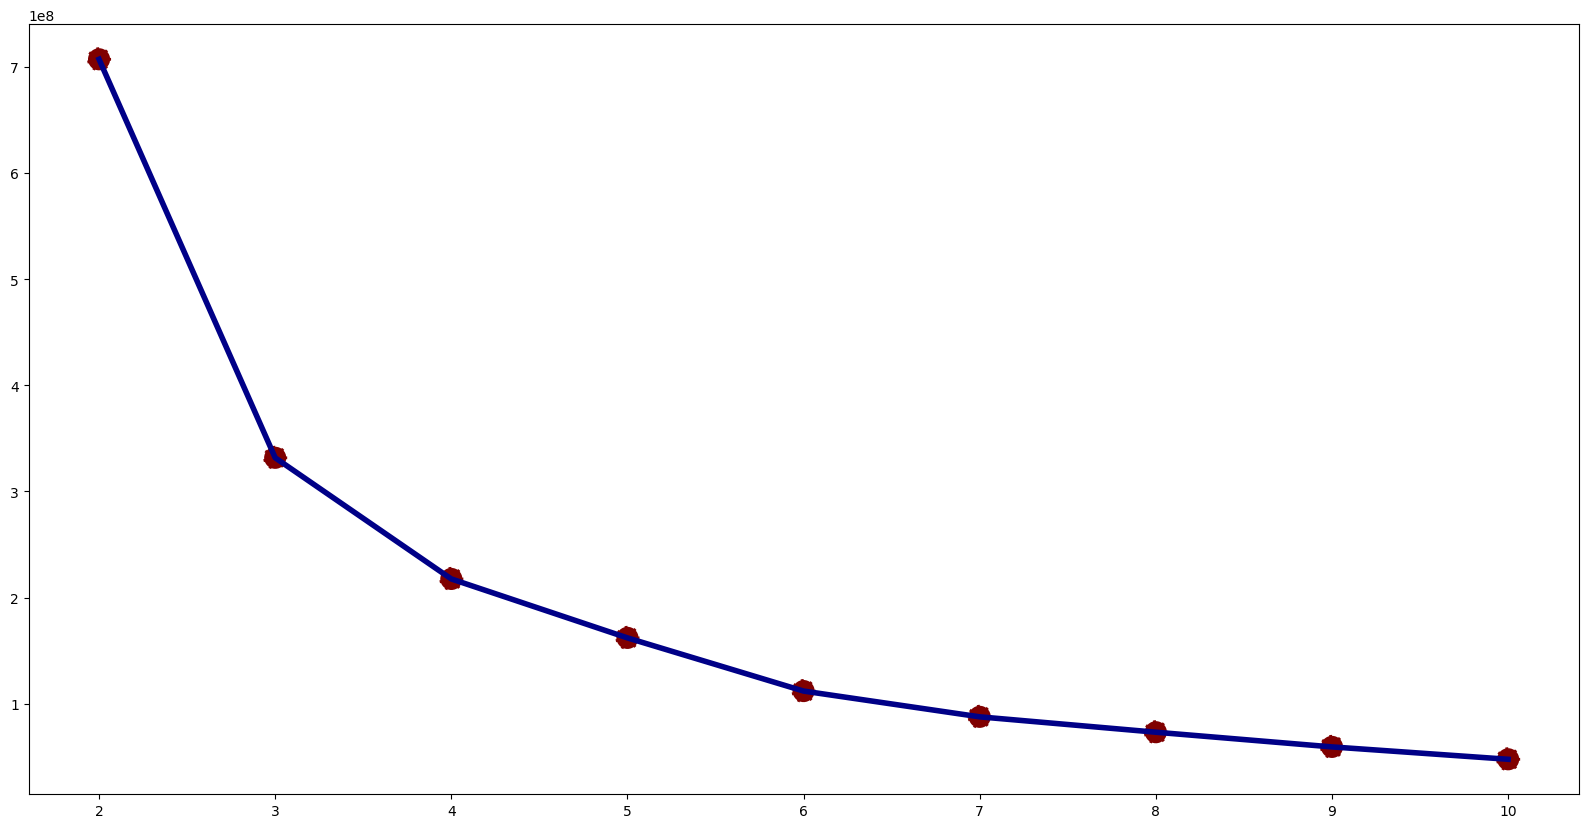

In [381]:
plt.figure(figsize=(20, 10))

sb.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sb.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [382]:
kmeans = KMeans(n_clusters=3, random_state=26)
kmeans.fit(df)

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=26)

In [383]:
cluster = kmeans.labels_

In [384]:
df['Cluster'] = cluster

In [385]:
df

jumlah_terdampak_rw  jumlah_terdampak_kk  \
kelurahan                                                     
ANCOL                             12.0                   50   
APA DUA                            2.0                    0   
APA DUA WETAN                     12.0                  105   
APA GADING BARAT                  13.0                    0   
APA GADING TIMUR                  15.0                   90   
...                                ...                  ...   
UTAN KAYU SELATAN                  8.0                    0   
UTAN KAYU UTARA                    2.0                    0   
WARAKAS                            4.0                    0   
WIJAYA KESUMA                      1.0                    0   
WIJAYA KUSUMA                     12.0                   52   

                   jumlah_terdampak_jiwa  lama_genangan  jumlah_hilang  \
kelurahan                                                                
ANCOL                                200              0            0.0   
APA DUA                                0              0            0.0   
APA DUA WETAN                        335              0            0.0   
APA GADING BARAT                       0              0            0.0   
APA GADING TIMUR                     371              0            0.0   
...                                  ...            ...            ...   
UTAN KAYU SELATAN                      0              0            0.0   
UTAN KAYU UTARA                        0              0            0.0   
WARAKAS                                0              0            0.0   
WIJAYA KESUMA                          0              0            0.0   
WIJAYA KUSUMA                        208              0            0.0   

                   jumlah_luka_ringan  jumlah_pengungsi_tertinggi  \
kelurahan                                                           
ANCOL                           200.0                         5.0   
APA DUA                           0.0                         0.0   
APA DUA WETAN                     0.0                         0.0   
APA GADING BARAT                  0.0                         0.0   
APA GADING TIMUR                371.0                         8.0   
...                               ...                         ...   
UTAN KAYU SELATAN                 0.0                         0.0   
UTAN KAYU UTARA                   0.0                         0.0   
WARAKAS                           0.0                         0.0   
WIJAYA KESUMA                     0.0                         0.0   
WIJAYA KUSUMA                   208.0                         3.0   

                   berapa hari / kali terkena banjir  Cluster  
kelurahan                                                      
ANCOL                                           11.0        0  
APA DUA                                          3.0        0  
APA DUA WETAN                                    5.0        0  
APA GADING BARAT                                 4.0        0  
APA GADING TIMUR                                 4.0        0  
...                                              ...      ...  
UTAN KAYU SELATAN                                5.0        0  
UTAN KAYU UTARA                                  2.0        0  
WARAKAS                                          2.0        0  
WIJAYA KESUMA                                    1.0        0  
WIJAYA KUSUMA                                    5.0        0  

[232 rows x 9 columns]

In [386]:
pca = PCA(n_components=2)

df_pca = pd.DataFrame(data = pca.fit_transform(df), columns = ['PC 1', 'PC 2'])
df_pca

PC 1        PC 2
0    -942.825462 -119.398685
1   -1185.671197 -272.890859
2    -842.143827 -345.411965
3   -1185.624362 -272.828323
4    -736.050569   12.053137
..           ...         ...
227 -1185.639824 -272.855628
228 -1185.675203 -272.891629
229 -1185.667416 -272.880399
230 -1185.683102 -272.898014
231  -933.141776 -113.268913

[232 rows x 2 columns]

In [387]:
df_pca['cluster'] = cluster
df_pca

PC 1        PC 2  cluster
0    -942.825462 -119.398685        0
1   -1185.671197 -272.890859        0
2    -842.143827 -345.411965        0
3   -1185.624362 -272.828323        0
4    -736.050569   12.053137        0
..           ...         ...      ...
227 -1185.639824 -272.855628        0
228 -1185.675203 -272.891629        0
229 -1185.667416 -272.880399        0
230 -1185.683102 -272.898014        0
231  -933.141776 -113.268913        0

[232 rows x 3 columns]

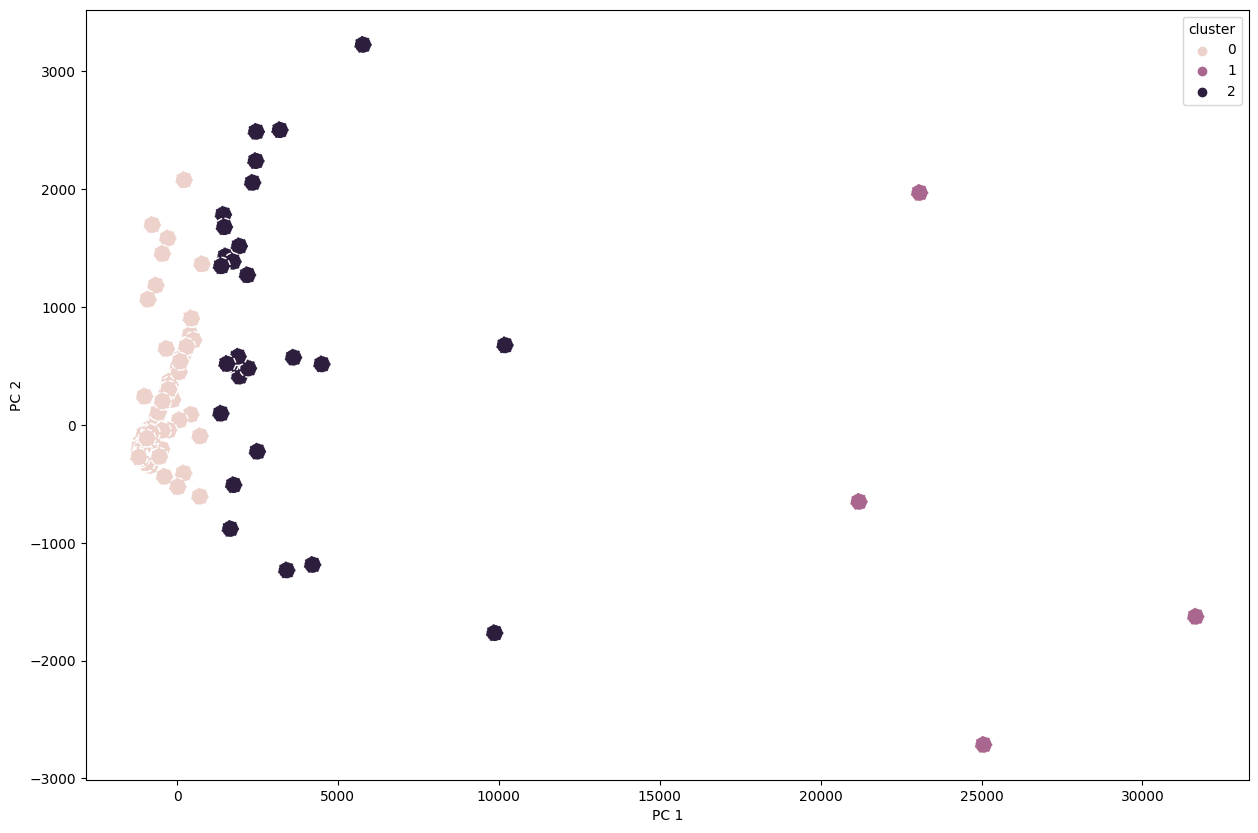

In [388]:
fig, ax = plt.subplots(figsize=(15,10))

sb.scatterplot(
    x='PC 1', y='PC 2',
    hue='cluster',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

In [389]:
df.groupby('Cluster').mean()

jumlah_terdampak_rw  jumlah_terdampak_kk  jumlah_terdampak_jiwa  \
Cluster                                                                    
0                  10.159204            61.721393             232.870647   
1                 109.250000          7559.000000           24835.500000   
2                  29.703704          1077.444444            3691.888889   

         lama_genangan  jumlah_hilang  jumlah_luka_ringan  \
Cluster                                                     
0             0.089552       0.000000          235.616915   
1             1.250000       0.000000         4986.750000   
2             0.185185       0.037037         1902.962963   

         jumlah_pengungsi_tertinggi  berapa hari / kali terkena banjir  
Cluster                                                                 
0                          4.407960                           8.402985  
1                         30.750000                         113.500000  
2                         16.333333                          22.296296

In [400]:
silhouette_score(df.iloc[:,1:8], df['Cluster'], metric="euclidean")

0.7820788675222228